Goal: Develop a sentiment classifier that determines the sentiment of documents as positive or negative.

## Yelp review classification


### Load dataset

The datafile `yelp.csv` contains 10,000 reviews and its metadata (e.g., date, stars, user_id, business_id).
Let's load the data.

In [1]:
import pandas as pd

df = pd.read_csv('/Users/jeewonkim/Desktop/yelp.csv')
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


Here, only `text` and `stars` columns will be used for sentiment analysis. Drop the other columns.

In [2]:
df = df.drop(['business_id', 'date', 'review_id', 'type', 'user_id', 'cool', 'useful', 'funny'], axis=1)

In [3]:
df.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


check a first example

In [4]:
print(df['text'][0])
print(df['stars'][0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
5


Check the distribution of rating.

In [5]:
df.stars.value_counts() # distribution of the number of stars

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

<AxesSubplot:ylabel='Frequency'>

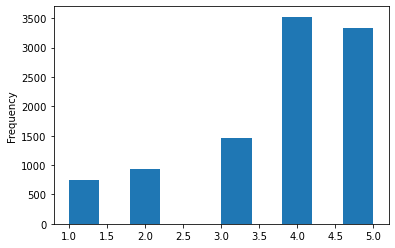

In [6]:
df.stars.plot.hist()

We will label rewiews with stars 4 or 5 as `positive` (class=1) and reviews with stars 1 or 2 as `negative` (class=0).

In [7]:
df = df[df['stars'] != 3] # delete reviews having stars=3
df['sentiment'] = df['stars'].apply(lambda x: 1 if x > 3 else 0) # transform 'stars' to 'sentiment'

In [8]:
df

,stars,text,sentiment
0,5,My wife took me here on my birthday for breakf...,1
1,5,I have no idea why some people give bad review...,1
2,4,love the gyro plate. Rice is so good and I als...,1
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1
4,5,General Manager Scott Petello is a good egg!!!...,1
...,...,...,...
9994,5,Let's see...what is there NOT to like about Su...,1
9996,4,Should be called house of deliciousness!\n\nI ...,1
9997,4,I recently visited Olive and Ivy for business ...,1
9998,2,My nephew just moved to Scottsdale recently so...,0


In [9]:
df.sentiment.value_counts()

1    6863
0    1676
Name: sentiment, dtype: int64

Word cloud visualization for text reviews

In [10]:
! pip install wordcloud

http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud

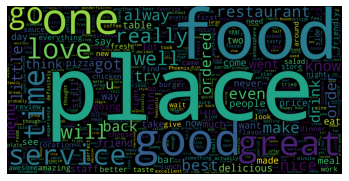

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df.text.values) # all text documents in one string
wc = WordCloud(width=2000, height=1000, max_words=500).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

I also recommend to use online wordcloud generor (e.g., http://wordcloud.kr/) for convenience

### Document vectorization

We will use `sklearn` package to transform text into BOW (bag-of-words) vectors.

We have two options:
- `CountVectorizer`: return vectors having **term frequencies** (docuemnt [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html))
- `TfidfVectorizer`: return vectors having **Tf-Idf (term frequency-inverse docuement frequency) values** (document [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html))

The code below will extract the top 1000 frequent tokens consisting of unigrams and bigrams. Stopwords are removed using the predefined stopwords list in the `sklearn` package.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# The usage of these two classes is almost identical.
count_vect = CountVectorizer(max_features=1000, # select top 1000 frequent tokens
                             ngram_range=(1, 2), # use unigram and bigram
                             lowercase=True, # lowercase input text
                             stop_words='english') # remove predefined stop words for English
count_vect.fit(df['text'])
X_counts = count_vect.transform(df['text'])

tfidf_vect = TfidfVectorizer(max_features=1000, # select top 1000 frequent tokens
                             ngram_range=(1, 2), # use unigram and bigram
                             lowercase=True, # convert all characters to lowercase before tokenizing
                             stop_words='english') # remove predefined stop words for English
tfidf_vect.fit(df['text'])
X_tfidfs = tfidf_vect.transform(df['text'])

X_counts.shape, X_tfidfs.shape

/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


((8539, 1000), (8539, 1000))

Let's check the resulting matrix!

In [13]:
# sparse matrix이다

X_counts, X_tfidfs

(<8539x1000 sparse matrix of type '<class 'numpy.int64'>'
 	with 275700 stored elements in Compressed Sparse Row format>,
 <8539x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 275700 stored elements in Compressed Sparse Row format>)

Let's make them visible using pandas dataframe
(This is not necessary)
- The resulting `X_counts` and `X_tfidfs` are sparse matrices (designed for memory efficiency) with no direct access to their values. To see their values, we have to use the `.todense()` method.
- For the vectorizers, use `.get_feature_names_out()` method to check the extracted tokens.

In [14]:
# sparse dataset임

df_bow_tf = pd.DataFrame(X_counts.todense(), columns=count_vect.get_feature_names_out())
df_bow_tf

,00,10,100,11,12,15,20,25,30,40,...,wrong,yeah,year,years,yelp,yes,yogurt,young,yum,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8534,0,1,0,0,0,1,0,1,1,0,...,0,0,2,0,0,0,0,0,0,0
8535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_bow_tfidf = pd.DataFrame(X_tfidfs.todense(), columns=tfidf_vect.get_feature_names_out())
df_bow_tfidf

,00,10,100,11,12,15,20,25,30,40,...,wrong,yeah,year,years,yelp,yes,yogurt,young,yum,yummy
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.113564,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8534,0.0,0.068843,0.0,0.000000,0.0,0.083419,0.0,0.095147,0.080826,0.0,...,0.0,0.0,0.156424,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
8535,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
8536,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.07541,0.0,0.0,0.0,0.0,0.0,0.0
8537,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


We are ready to develop machine learning models for sentiment classification!

###  Develop sentiment classifiers

Here, we will develop a logistic regression with Lasso penaly.  
I will use tfidf representation. 

In [16]:
X = df_bow_tfidf
y = df.sentiment
X.shape, y.shape

((8539, 1000), (8539,))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# data split
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
X_trn.shape, X_tst.shape, y_trn.shape, y_tst.shape

# model training: Lasso (l1 penalty)
clf = LogisticRegression(penalty='l1', solver='saga', C=10, random_state=0)
clf.fit(X_trn, y_trn)

# model evaluation
y_trn_pred = clf.predict(X_trn)
acc = accuracy_score(y_trn, y_trn_pred)
f1 = f1_score(y_trn, y_trn_pred)
print('Training Accuracy: {:.4f}, Fscore: {:.4f}'.format(acc, f1))
y_tst_pred = clf.predict(X_tst)
acc = accuracy_score(y_tst, y_tst_pred)
f1 = f1_score(y_tst, y_tst_pred)
print('Test Accuracy: {:.4f}, Fscore: {:.4f}'.format(acc, f1))

Training Accuracy: 0.9620, Fscore: 0.9765
Test Accuracy: 0.8899, Fscore: 0.9321


/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


It works pretty well, showing a high f1 score!

**f1 score 쓰는 이유 : class imbalance 문제때문이다. accuracy 가 not enough for this problem**

Let's check features(words) for the positive or negative sentiment respectively.

In [18]:
import numpy as np

# coefficient values and their corresponding feature names
coefficient_values = clf.coef_.squeeze()
feature_names = X.columns

# get index to access the values in ascending order
args = np.argsort(coefficient_values)

In [19]:
print('top 20 negative words:')
for token, coef in zip(feature_names[args[:20]], coefficient_values[args[:20]]):
    print('{:<20}: {:.4f}'.format(token, coef))

top 20 negative words:
bland               : -16.3376
overpriced          : -16.1787
worst               : -14.6233
horrible            : -12.7688
rude                : -11.9562
poor                : -11.1253
wait staff          : -10.9950
okay                : -9.8193
gross               : -9.5378
tasted like         : -9.0886
terrible            : -8.9191
slow                : -8.6368
pulled              : -8.3896
wouldn              : -8.0003
based               : -7.7839
excited             : -7.7733
ok                  : -7.7107
running             : -7.4427
wasn                : -7.3637
leave               : -7.1232


In [22]:
print('top 20 positive words:')
for token, coef in zip(feature_names[args[-20:][::-1]], coefficient_values[args[-20:]][::-1]): # [::-1] for reversing the order
    print('{:>20}: {:.4f}'.format(token, coef))

top 20 positive words:
             perfect: 25.2771
               great: 17.1120
           excellent: 16.5403
               mouth: 14.5933
                beat: 14.5059
             vanilla: 14.4429
             awesome: 13.8311
         comfortable: 13.3738
           fantastic: 13.1725
           authentic: 12.9672
                best: 11.9509
              packed: 11.5052
             amazing: 11.4866
               happy: 11.1433
             healthy: 11.1219
                 yum: 11.0707
               yummy: 11.0149
         really like: 10.8784
          just right: 10.7436
         outstanding: 10.6438


## Task

Find a best hyperparameter combination using **Pipeline** and **GridSearchCV**

**Search space for GridSearchCV**
- CountVectorizer or TfidfVectorizer ? 
- ngram_range (1,1), (1,2) ?
- logistic regression with l1 penalty or RandomforestClassifier ?
- in case of logistic regression, C 0.1, 1, 10 ?  

Find the best hyperparameter within this search space.

In [20]:
df

,stars,text,sentiment
0,5,My wife took me here on my birthday for breakf...,1
1,5,I have no idea why some people give bad review...,1
2,4,love the gyro plate. Rice is so good and I als...,1
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1
4,5,General Manager Scott Petello is a good egg!!!...,1
...,...,...,...
9994,5,Let's see...what is there NOT to like about Su...,1
9996,4,Should be called house of deliciousness!\n\nI ...,1
9997,4,I recently visited Olive and Ivy for business ...,1
9998,2,My nephew just moved to Scottsdale recently so...,0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# data split
X_trn, X_tst, y_trn, y_tst = train_test_split(df['text'], df['sentiment'], test_size=0.3, stratify=y, random_state=0)

stopwords : 불용어

stopwords("english")는 영어 불용어 리스트

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([("preprocessing", None), ("classifier", None)])

'''TODO: Create an appropriate param_grid to put in GridSearchCV

param_grid = [
]
'''
param_grid = [
    {'preprocessing': [CountVectorizer(max_features=1000, stop_words='english'), TfidfVectorizer(max_features=1000, stop_words='english')],
     'preprocessing__ngram_range': [(1, 1), (1, 2)],     
     'classifier': [LogisticRegression(penalty='l1', solver='saga')], 
     'classifier__C': [0.1, 1, 10]},
    {'preprocessing': [CountVectorizer(max_features=1000, stop_words='english'), TfidfVectorizer(max_features=1000, stop_words='english')],
     'preprocessing__ngram_range': [(1, 1), (1, 2)],
     'classifier': [RandomForestClassifier()]}]


grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1')
grid.fit(X_trn, y_trn)


/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jeewonkim/opt/anaconda3

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', None),
                                       ('classifier', None)]),
             param_grid=[{'classifier': [LogisticRegression(C=1, penalty='l1',
                                                            solver='saga')],
                          'classifier__C': [0.1, 1, 10],
                          'preprocessing': [CountVectorizer(max_features=1000,
                                                            ngram_range=(1, 2),
                                                            stop_words='english'),
                                            TfidfVectorizer(max_features=1000,
                                                            stop_words='english')],
                          'preprocessing__ngram_range': [(1, 1), (1, 2)]},
                         {'classifier': [RandomForestClassifier()],
                          'preprocessing': [CountVectorizer(max_features=1000,
              

In [24]:
print("Best hyperparams: {}".format(grid.best_params_))
print("Best cross-validation score: {}".format(grid.best_score_))
print("Test-set score: {}".format(grid.score(X_tst, y_tst)))

Best hyperparams: {'classifier': LogisticRegression(C=1, penalty='l1', solver='saga'), 'classifier__C': 1, 'preprocessing': CountVectorizer(max_features=1000, ngram_range=(1, 2), stop_words='english'), 'preprocessing__ngram_range': (1, 2)}
Best cross-validation score: 0.9375178875590908
Test-set score: 0.93971884679533


check all results for all candidates.   
how many combinations exist?

In [25]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_preprocessing,param_preprocessing__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.657962,0.012012,0.067391,0.001457,"LogisticRegression(C=1, penalty='l1', solver='...",0.1,"CountVectorizer(max_features=1000, ngram_range...","(1, 1)","{'classifier': LogisticRegression(C=1, penalty...",0.929816,0.930233,0.932058,0.929688,0.932930,0.930945,0.001307,7
1,1.159946,0.020183,0.094849,0.001136,"LogisticRegression(C=1, penalty='l1', solver='...",0.1,"CountVectorizer(max_features=1000, ngram_range...","(1, 2)","{'classifier': LogisticRegression(C=1, penalty...",0.929746,0.930762,0.933468,0.927734,0.932930,0.930928,0.002102,8
2,0.301765,0.002153,0.074439,0.000982,"LogisticRegression(C=1, penalty='l1', solver='...",0.1,"TfidfVectorizer(max_features=1000, stop_words=...","(1, 1)","{'classifier': LogisticRegression(C=1, penalty...",0.887959,0.900230,0.883699,0.898618,0.885261,0.891153,0.006908,15
3,0.781974,0.013632,0.102789,0.001092,"LogisticRegression(C=1, penalty='l1', solver='...",0.1,"TfidfVectorizer(max_features=1000, stop_words=...","(1, 2)","{'classifier': LogisticRegression(C=1, penalty...",0.887959,0.900230,0.883699,0.898618,0.885261,0.891153,0.006908,15
4,2.279323,0.045598,0.066616,0.000541,"LogisticRegression(C=1, penalty='l1', solver='...",1,"CountVectorizer(max_features=1000, ngram_range...","(1, 1)","{'classifier': LogisticRegression(C=1, penalty...",0.933471,0.931298,0.940452,0.938920,0.938208,0.936470,0.003482,2
5,2.723667,0.047149,0.095291,0.001095,"LogisticRegression(C=1, penalty='l1', solver='...",1,"CountVectorizer(max_features=1000, ngram_range...","(1, 2)","{'classifier': LogisticRegression(C=1, penalty...",0.936631,0.933809,0.940935,0.936556,0.939660,0.937518,0.002519,1
6,0.479329,0.013014,0.074466,0.000821,"LogisticRegression(C=1, penalty='l1', solver='...",1,"TfidfVectorizer(max_features=1000, stop_words=...","(1, 1)","{'classifier': LogisticRegression(C=1, penalty...",0.933065,0.936696,0.938446,0.937008,0.935696,0.936182,0.001790,3
7,0.952276,0.039148,0.103455,0.001347,"LogisticRegression(C=1, penalty='l1', solver='...",1,"TfidfVectorizer(max_features=1000, stop_words=...","(1, 2)","{'classifier': LogisticRegression(C=1, penalty...",0.933602,0.936170,0.936837,0.933596,0.936235,0.935288,0.001399,5
8,3.151929,0.026782,0.066488,0.000633,"LogisticRegression(C=1, penalty='l1', solver='...",10,"CountVectorizer(max_features=1000, ngram_range...","(1, 1)","{'classifier': LogisticRegression(C=1, penalty...",0.931606,0.931298,0.940206,0.936556,0.937532,0.935440,0.003470,4
9,3.683261,0.062882,0.096498,0.003270,"LogisticRegression(C=1, penalty='l1', solver='...",10,"CountVectorizer(max_features=1000, ngram_range...","(1, 2)","{'classifier': LogisticRegression(C=1, penalty...",0.930570,0.933809,0.937661,0.932930,0.936500,0.934294,0.002536,6


we can access to the specific step of the pipeline using 'named_steps'

In [26]:
'''TODO: access to the preprocessing module and classifier of the pipeline chosen by GridSearchCV

chosen_extractor = 
chosen_classifier = 

'''

chosen_extractor = grid.best_estimator_.named_steps['preprocessing']
chosen_classifier = grid.best_estimator_.named_steps['classifier']

In [27]:
# coefficient values and their corresponding feature names
coefficient_values = chosen_classifier.coef_.squeeze()
feature_names = chosen_extractor.get_feature_names_out()

# get index to access the values in ascending order
args = np.argsort(coefficient_values)

In [28]:
print('top 10 negative words:')
for token, coef in zip(feature_names[args[:20]], coefficient_values[args[:20]]):
    print('{:<20}: {:.4f}'.format(token, coef))

top 10 negative words:
overpriced          : -1.6855
mediocre            : -1.5811
horrible            : -1.5538
bland               : -1.5404
worst               : -1.2850
poor                : -1.2095
rude                : -1.1961
unfortunately       : -1.0827
okay                : -1.0168
terrible            : -0.9779
wouldn              : -0.9405
slow                : -0.9072
dry                 : -0.9071
disappointed        : -0.8631
money               : -0.8378
awful               : -0.8284
customers           : -0.8243
gross               : -0.7906
tasted              : -0.7886
dirty               : -0.7743


In [29]:
print('top 10 positive words:')
for token, coef in zip(feature_names[args[-20:][::-1]], coefficient_values[args[-20:]][::-1]): # [::-1] for reversing the order
    print('{:>20}: {:.4f}'.format(token, coef))

top 10 positive words:
           excellent: 1.7316
             perfect: 1.6202
           delicious: 1.5579
             amazing: 1.3657
             awesome: 1.3351
               great: 1.2234
           fantastic: 1.1667
            favorite: 1.1351
                best: 1.0546
               fresh: 1.0210
               loved: 1.0159
           wonderful: 0.9847
                love: 0.9763
              highly: 0.9593
               happy: 0.9342
             enjoyed: 0.9235
               yummy: 0.9053
           authentic: 0.8930
          definitely: 0.8703
           recommend: 0.8641
